# Applied Social Network Analysis in Python

## Chapter 2-4. Network Robustness
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/network-robustness-3pGvt)**

<hr>

### Connectivity and Robustness in Networks

* **Network Robustness** : the ability of a network to maintain its general structual properties when it faces failure or attack.
* **Type of Attacl** : removal of nodes or edges.
* **Structural properties** : Connectivity

it is important because if lost of a node or an edge cause of disconnection between subset, then each others will be isolated that can cause some disadventage of network. So That is the case where the network might have lost an edge rather than a node, and you would like for the network to still maintain its connectivity or functions.

> Example : Airport Closures, Internet router failures, power line failures.

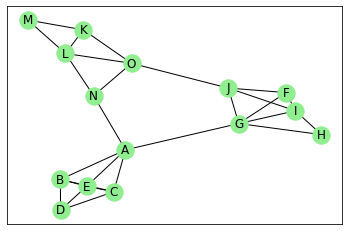

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy # Graph copy
%matplotlib inline

# Creating Undirected and Directed Graphs for next example.
G_un = nx.Graph()
G_di = nx.DiGraph()

# add edges into graph.
un_edge_list = [
    ('A','B'),('A','C'),('A','E'),('B','E'),('B','D'),('B','C'),('C','E'),('C','D'),('D','E'),('A','G'),('A','N'),
    ('G','F'),('G','H'),('G','I'),('G','J'),('F','I'),('F','J'),('J','I'),('I','H'),('J','O'),
    ('O','N'),('L','N'),('O','L'),('O','K'),('L','K'),('M','K'),('L','M'),
]

di_edge_list = [
    ('A','B'),('A','E'),('A','N'),('B','C'),('B','E'),('C','A'),('C','D'),('D','B'),('D','E'),('E','D'),('E','C'),
    ('F','G'),('G','A'),('G','J'),('H','G'),('H','I'),('I','H'),('I','G'),('I','J'),('I','F'),('J','F'),('J','O'),
    ('N','O'),('N','L'),('O','J'),('O','K'),('O','L'),('K','L'),('K','M'),('L','M'),
]

for n1, n2, in un_edge_list:
    G_un.add_edge(n1, n2)
    
for n1, n2, in di_edge_list:
    G_di.add_edge(n1, n2)
    
pos = nx.spring_layout(G_un, seed=201703)

nx.draw_networkx(G_un, pos, node_color='lightgreen') # Undirected
#nx.draw_networkx(G_di, pos, node_color='lightgreen') # Directed
plt.show()

<hr>

### Disconnecting a Graph

What is the smallest number of **nodes** that can be removed from this graph in order to disconnect it?<br>
we can usually use below function in `networkx`, input will be undirected graph. then you can get the nodes even what nodes.
```python
nx.node_connectivity(G_un) # Smallest Number of Nodes for disconnection
nx.minimum_node_cut(G_un) # which nodes are in the smallest number for disconnection
```
> out : 1, {'A'}

minimum number of nodes for disconnection : 1
nodes for disconnection : {'A'}


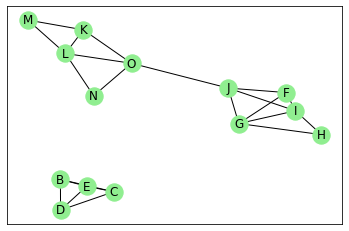

In [2]:
node_test_G = deepcopy(G_un) # copy original network

minimum = nx.node_connectivity(node_test_G)
dis_nodes = nx.minimum_node_cut(node_test_G)
print(f'minimum number of nodes for disconnection : {minimum}')
print(f'nodes for disconnection : {dis_nodes}')

for n in dis_nodes:
    node_test_G.remove_node(n)
    
nx.draw_networkx(node_test_G, pos, node_color='lightgreen')
plt.show()

What is the smallest number of **edges** that can be removed from this graph in order to disconnect it?<br>
we can usually use below function in `networkx`, input will be undirected graph. then you can get the nodes even what nodes.
```python
nx.node_connectivity(G_un) # Smallest Number of Nodes for disconnection
nx.minimum_node_cut(G_un) # which nodes are in the smallest number for disconnection
```
> out : 2, {('G', 'A'), ('N', 'A')}

you can see that if you remove those two edges, you indeed make the network disconnected. <br>
There may be other options, other pairs of edges that achieve the same goal of disconnecting the network. 

minimum number of nodes for disconnection : 2
nodes for disconnection : {('G', 'A'), ('N', 'A')}


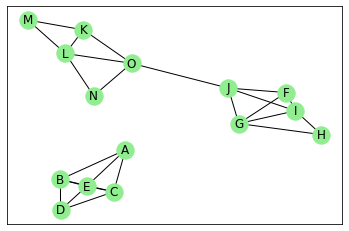

In [3]:
node_test_G = deepcopy(G_un) # copy original network

minimum = nx.edge_connectivity(node_test_G)
dis_edges = nx.minimum_edge_cut(node_test_G)
print(f'minimum number of nodes for disconnection : {minimum}')
print(f'nodes for disconnection : {dis_edges}')

for n1, n2 in dis_edges:
    node_test_G.remove_edge(n1, n2)
    
nx.draw_networkx(node_test_G, pos, node_color='lightgreen')
plt.show()

<hr>

### Simple Paths

Imagine node $G$ wants to send a message to node $L$ by passing it along to other nodes in directed graph.<br>
What options does $G$ have to deliver the message? If you put node $G$ as source and $L$ as destination, you can get all paths.
```python
sorted(nx.all_simple_paths(G_di,'G','L'))
```
> out : [['G', 'A', 'N', 'L'],<br>
 ['G', 'A', 'N', 'O', 'K', 'L'],<br>
 ['G', 'A', 'N', 'O', 'L'],<br>
 ['G', 'J', 'O', 'K', 'L'],<br>
 ['G', 'J', 'O', 'L']]
 
### Node Connectivity
If we want to block the message from $G$ to $L$ by removing **nodes** from the directed graph, <br>
how many nodes would we need to remove?
```python
nx.node_connectivity(G_di, 'G', 'L')
```
> out : 2

```python
nx.minimum_node_cut(G_di, 'G', 'L')
```
> out : {'O', 'N'}

If we only remove node $N$,message can go on path : `G->J->O->K->L`<br>
If we only remove node $O$,message can go on path : `G->A->N->L`

So you need two, and these are two that achieve that. 

all possible paths to reach "G" to "L" : [['G', 'A', 'N', 'L'], ['G', 'A', 'N', 'O', 'K', 'L'], ['G', 'A', 'N', 'O', 'L'], ['G', 'J', 'O', 'K', 'L'], ['G', 'J', 'O', 'L']]
minimum number of nodes for disconnection between "G" and "L": 2
nodes for disconnection between "G" and "L" : {'O', 'N'}


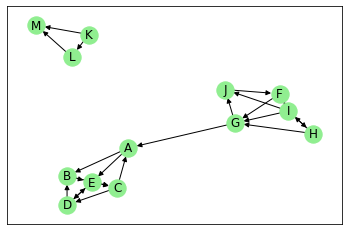

In [4]:
node_test_G = deepcopy(G_di) # copy original network

all_possible_paths = sorted(nx.all_simple_paths(G_di,'G','L'))
minimum = nx.node_connectivity(node_test_G, 'G', 'L')
dis_nodes = nx.minimum_node_cut(node_test_G, 'G', 'L')

print(f'all possible paths to reach "G" to "L" : {all_possible_paths}')
print(f'minimum number of nodes for disconnection between "G" and "L": {minimum}')
print(f'nodes for disconnection between "G" and "L" : {dis_nodes}')

for n in dis_nodes:
    node_test_G.remove_node(n)
    
nx.draw_networkx(node_test_G, pos, node_color='lightgreen')
plt.show()

<hr>

### Edge Connectivity 
If we want to block the message from $G$ to $L$ by removing **edges** from the directed graph, <br>
how many edges would we need to remove?
```python
nx.edge_connectivity(G_di, 'G', 'L')
```
> out : 2

```python
nx.minimum_edge_cut(G_di, 'G', 'L')
```
> out : {('A', 'N'), ('J', 'O')}

We need to remove `A->N` and `J->O` to block messages from $G$ to $L$.

minimum number of edges for disconnection between "G" and "L": 2
edges for disconnection between "G" and "L" : {('J', 'O'), ('A', 'N')}


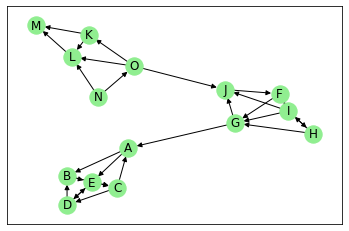

In [5]:
node_test_G = deepcopy(G_di) # copy original network

minimum = nx.edge_connectivity(node_test_G, 'G', 'L')
dis_edges = nx.minimum_edge_cut(node_test_G, 'G', 'L')

print(f'minimum number of edges for disconnection between "G" and "L": {minimum}')
print(f'edges for disconnection between "G" and "L" : {dis_edges}')

for n1, n2 in dis_edges:
    node_test_G.remove_edge(n1, n2)
    
nx.draw_networkx(node_test_G, pos, node_color='lightgreen')
plt.show()